In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('City_Zhvi_1bedroom.csv')
df.head(5)

,Unnamed: 0,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,139028.0,...,606162.0,604457.0,603126.0,601368.0,600138.0,598527.0,597268.0,597019.0,596725.0,596432.0
1,1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,114152.0,...,531014.0,530916.0,530814.0,531586.0,533161.0,534943.0,537784.0,541161.0,546048.0,550710.0
2,2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,68246.0,...,104937.0,105155.0,105502.0,105618.0,106083.0,106186.0,106299.0,106161.0,106271.0,106635.0
3,3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,95803.0,...,238850.0,239106.0,239230.0,239070.0,238942.0,238700.0,238530.0,238580.0,239266.0,240143.0
4,4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,55420.0,...,90717.0,91135.0,91256.0,91958.0,92577.0,93383.0,93500.0,93963.0,94115.0,94557.0


In [2]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 14927 rows and 300 columns.


In [3]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)


            Missing Values  Percentage
Metro                 3075   20.600255
1996-01-31           11875   79.553829
1996-02-29           11713   78.468547
1996-03-31           11664   78.140283
1996-04-30           11647   78.026395
...                    ...         ...
2017-09-30             517    3.463522
2017-10-31             467    3.128559
2017-11-30             431    2.887385
2017-12-31             404    2.706505
2018-01-31              69    0.462250

[266 rows x 2 columns]


In [4]:
# Drop non-numeric columns for summary statistics
numeric_df = df.drop(columns=['Unnamed: 0', 'RegionID', 'RegionName', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName'])

# Display summary statistics for each column
summary_stats = numeric_df.describe().T
print(summary_stats)


              count           mean            std      min       25%  \
SizeRank    14927.0   11023.768138    8045.487947      0.0   4197.00   
1996-01-31   3052.0   97987.753277   59082.286851  10996.0  59337.25   
1996-02-29   3214.0   97487.608276   58815.704695  10946.0  58684.25   
1996-03-31   3263.0   97120.899479   58597.929936  10945.0  58406.50   
1996-04-30   3280.0   97028.637805   58479.295995  10925.0  58175.00   
...             ...            ...            ...      ...       ...   
2019-11-30  14927.0  154130.071950  159455.610504  11049.0  72297.00   
2019-12-31  14927.0  154577.526228  160198.127690  11133.0  72431.50   
2020-01-31  14927.0  155086.631607  161191.235463  11199.0  72667.00   
2020-02-29  14927.0  155642.690963  162381.064626  11296.0  72859.00   
2020-03-31  14927.0  156215.785891  163703.936334  11401.0  73004.00   

                 50%        75%        max  
SizeRank      9407.0   16692.50    29449.0  
1996-01-31   86884.0  122122.25   689827.0  


In [5]:
df.dtypes

Unnamed: 0      int64
RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
               ...   
2019-11-30    float64
2019-12-31    float64
2020-01-31    float64
2020-02-29    float64
2020-03-31    float64
Length: 300, dtype: object

In [6]:
# Display unique values for specified categorical columns
categorical_columns = ['RegionName', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName']
unique_values = {col: df[col].nunique() for col in categorical_columns}
print(unique_values)


{'RegionName': 10486, 'RegionType': 1, 'StateName': 51, 'State': 51, 'Metro': 832, 'CountyName': 1554}


In [7]:
for i in df.columns:
    print(i)


Unnamed: 0
RegionID
SizeRank
RegionName
RegionType
StateName
State
Metro
CountyName
1996-01-31
1996-02-29
1996-03-31
1996-04-30
1996-05-31
1996-06-30
1996-07-31
1996-08-31
1996-09-30
1996-10-31
1996-11-30
1996-12-31
1997-01-31
1997-02-28
1997-03-31
1997-04-30
1997-05-31
1997-06-30
1997-07-31
1997-08-31
1997-09-30
1997-10-31
1997-11-30
1997-12-31
1998-01-31
1998-02-28
1998-03-31
1998-04-30
1998-05-31
1998-06-30
1998-07-31
1998-08-31
1998-09-30
1998-10-31
1998-11-30
1998-12-31
1999-01-31
1999-02-28
1999-03-31
1999-04-30
1999-05-31
1999-06-30
1999-07-31
1999-08-31
1999-09-30
1999-10-31
1999-11-30
1999-12-31
2000-01-31
2000-02-29
2000-03-31
2000-04-30
2000-05-31
2000-06-30
2000-07-31
2000-08-31
2000-09-30
2000-10-31
2000-11-30
2000-12-31
2001-01-31
2001-02-28
2001-03-31
2001-04-30
2001-05-31
2001-06-30
2001-07-31
2001-08-31
2001-09-30
2001-10-31
2001-11-30
2001-12-31
2002-01-31
2002-02-28
2002-03-31
2002-04-30
2002-05-31
2002-06-30
2002-07-31
2002-08-31
2002-09-30
2002-10-31
2002-11-30
200

Text(0, 0.5, 'Average House Price')

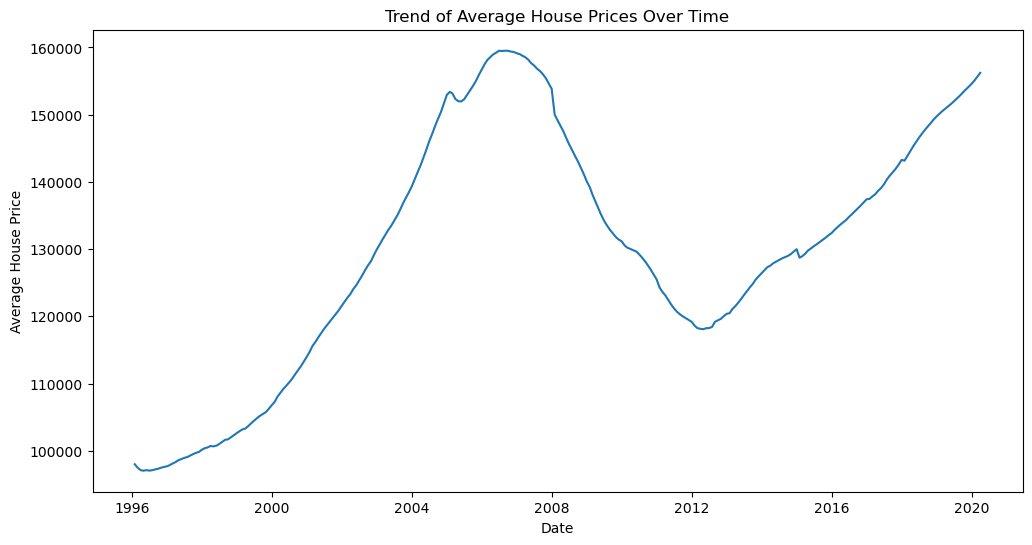

In [8]:
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName']
df_melted = pd.melt(df, id_vars=non_date_columns, var_name='Date', value_name='Price')
df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')
price_trend = df_melted.groupby('Date')['Price'].mean()

# Plot the trend of average house prices over time
plt.figure(figsize=(12, 6))
plt.plot(price_trend)
plt.title('Trend of Average House Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average House Price')

In [21]:
df_melted.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,NaT,0.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,NaT,1.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,NaT,2.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,NaT,3.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,NaT,4.0
5,13271,5,Philadelphia,City,PA,PA,Philadelphia-Camden-Wilmington,Philadelphia County,NaT,5.0
6,40326,6,Phoenix,City,AZ,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,NaT,6.0
7,18959,7,Las Vegas,City,NV,NV,Las Vegas-Henderson-Paradise,Clark County,NaT,7.0
8,54296,8,San Diego,City,CA,CA,San Diego-Carlsbad,San Diego County,NaT,8.0
9,38128,9,Dallas,City,TX,TX,Dallas-Fort Worth-Arlington,Dallas County,NaT,9.0


In [19]:
df_melted.to_excel('edited_file.csv', index=False)

ValueError: This sheet is too large! Your sheet size is: 4358684, 10 Max sheet size is: 1048576, 16384

Text(0, 0.5, 'Frequency')

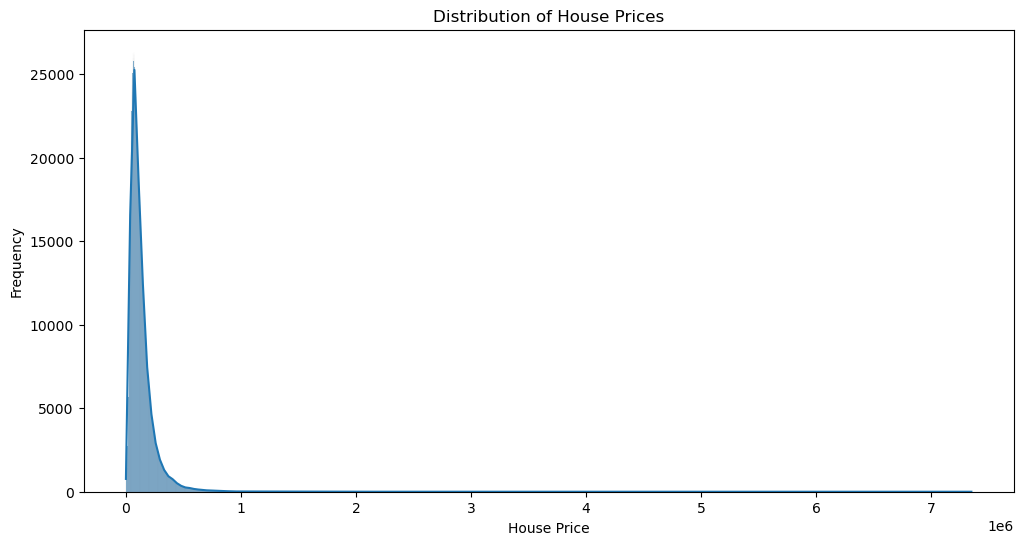

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df_melted['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Average House Price')

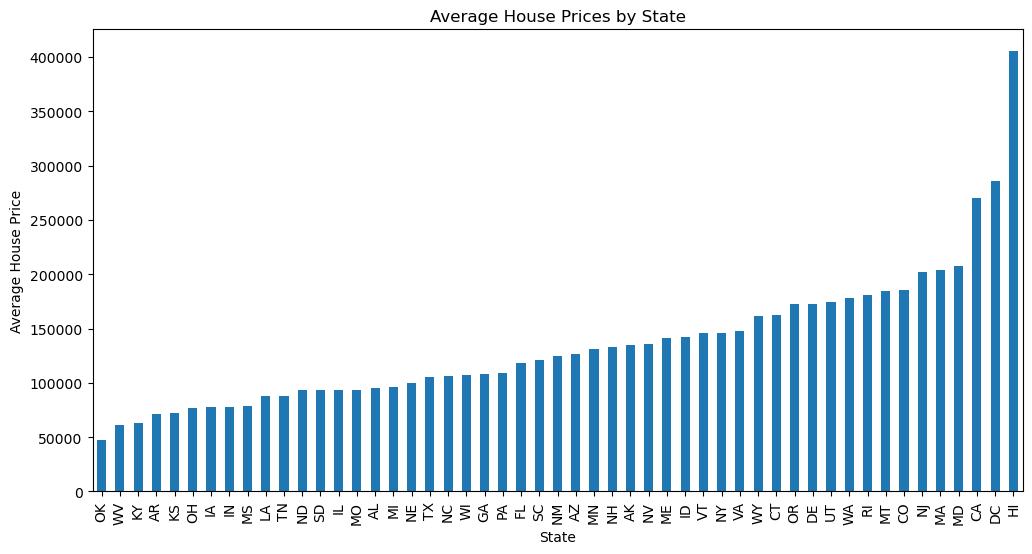

In [10]:
state_prices = df_melted.groupby('StateName')['Price'].mean().sort_values()

# Plot house prices by state
plt.figure(figsize=(12, 6))
state_prices.plot(kind='bar')
plt.title('Average House Prices by State')
plt.xlabel('State')
plt.ylabel('Average House Price')

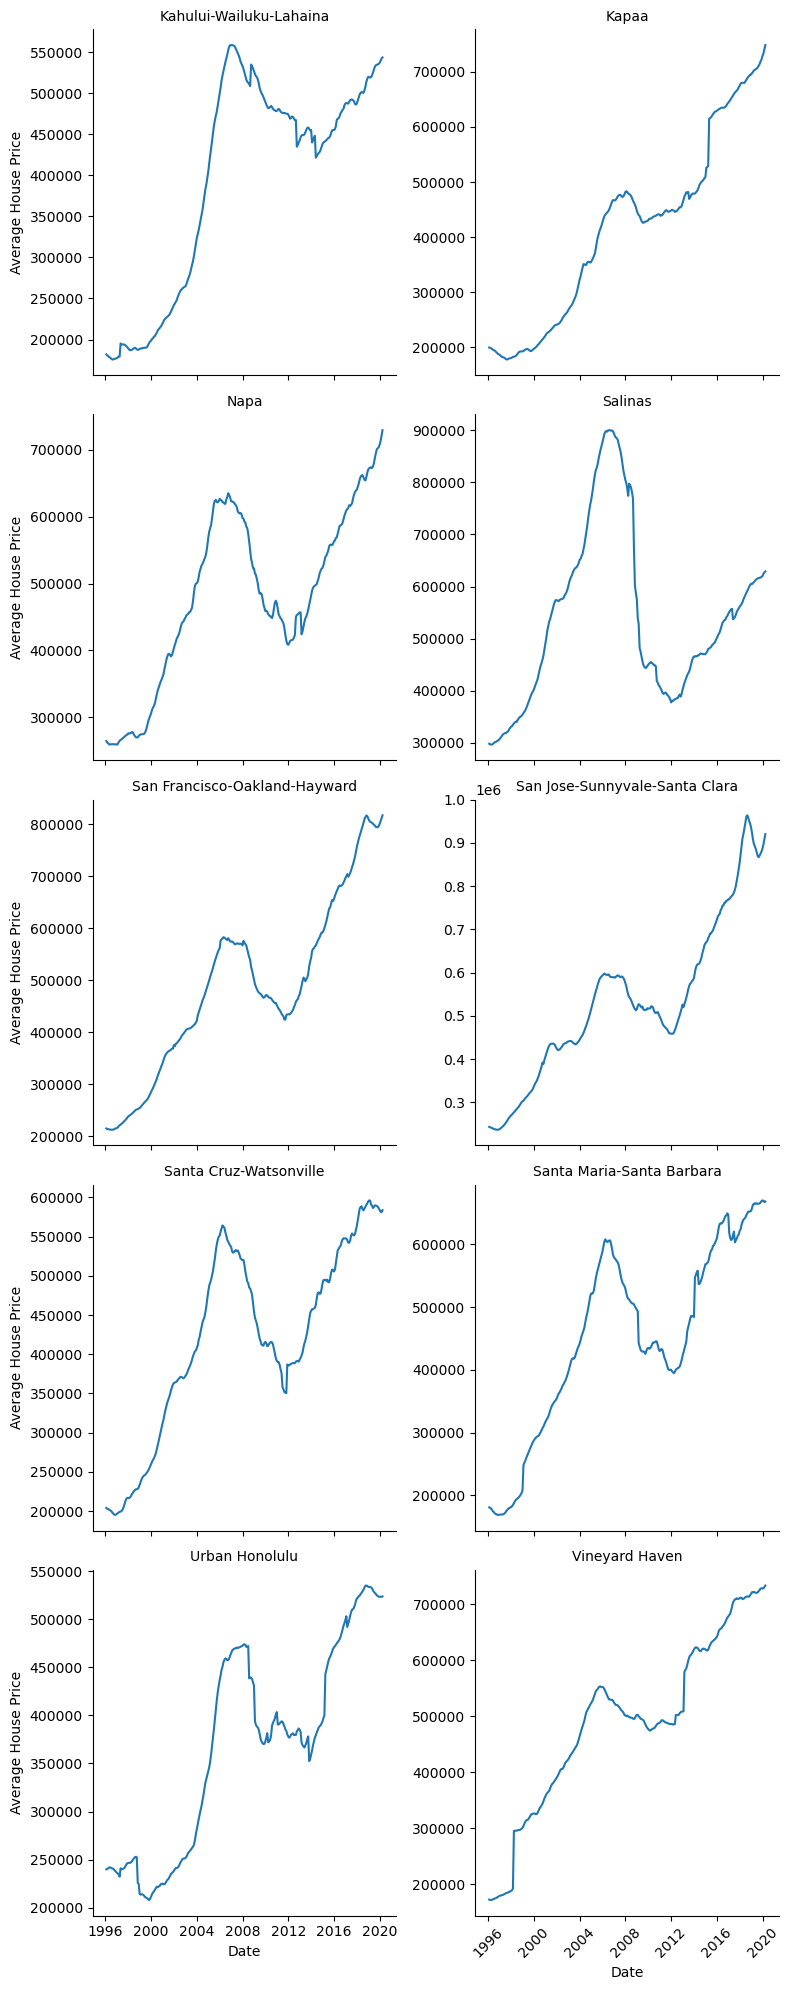

In [11]:
metro_avg_prices = df_melted.groupby(['Metro', 'Date']).mean().reset_index()

# Filter top 10 metro areas with highest average house prices
top_metros = metro_avg_prices.groupby('Metro')['Price'].mean().nlargest(10).index
top_metro_data = metro_avg_prices[metro_avg_prices['Metro'].isin(top_metros)]

# Plot multi-panel line charts
g = sns.FacetGrid(top_metro_data, col='Metro', col_wrap=2, height=4, sharey=False)
g.map(sns.lineplot, 'Date', 'Price')

g.set_axis_labels('Date', 'Average House Price')
g.set_titles('{col_name}')
plt.xticks(rotation=45)
plt.tight_layout()

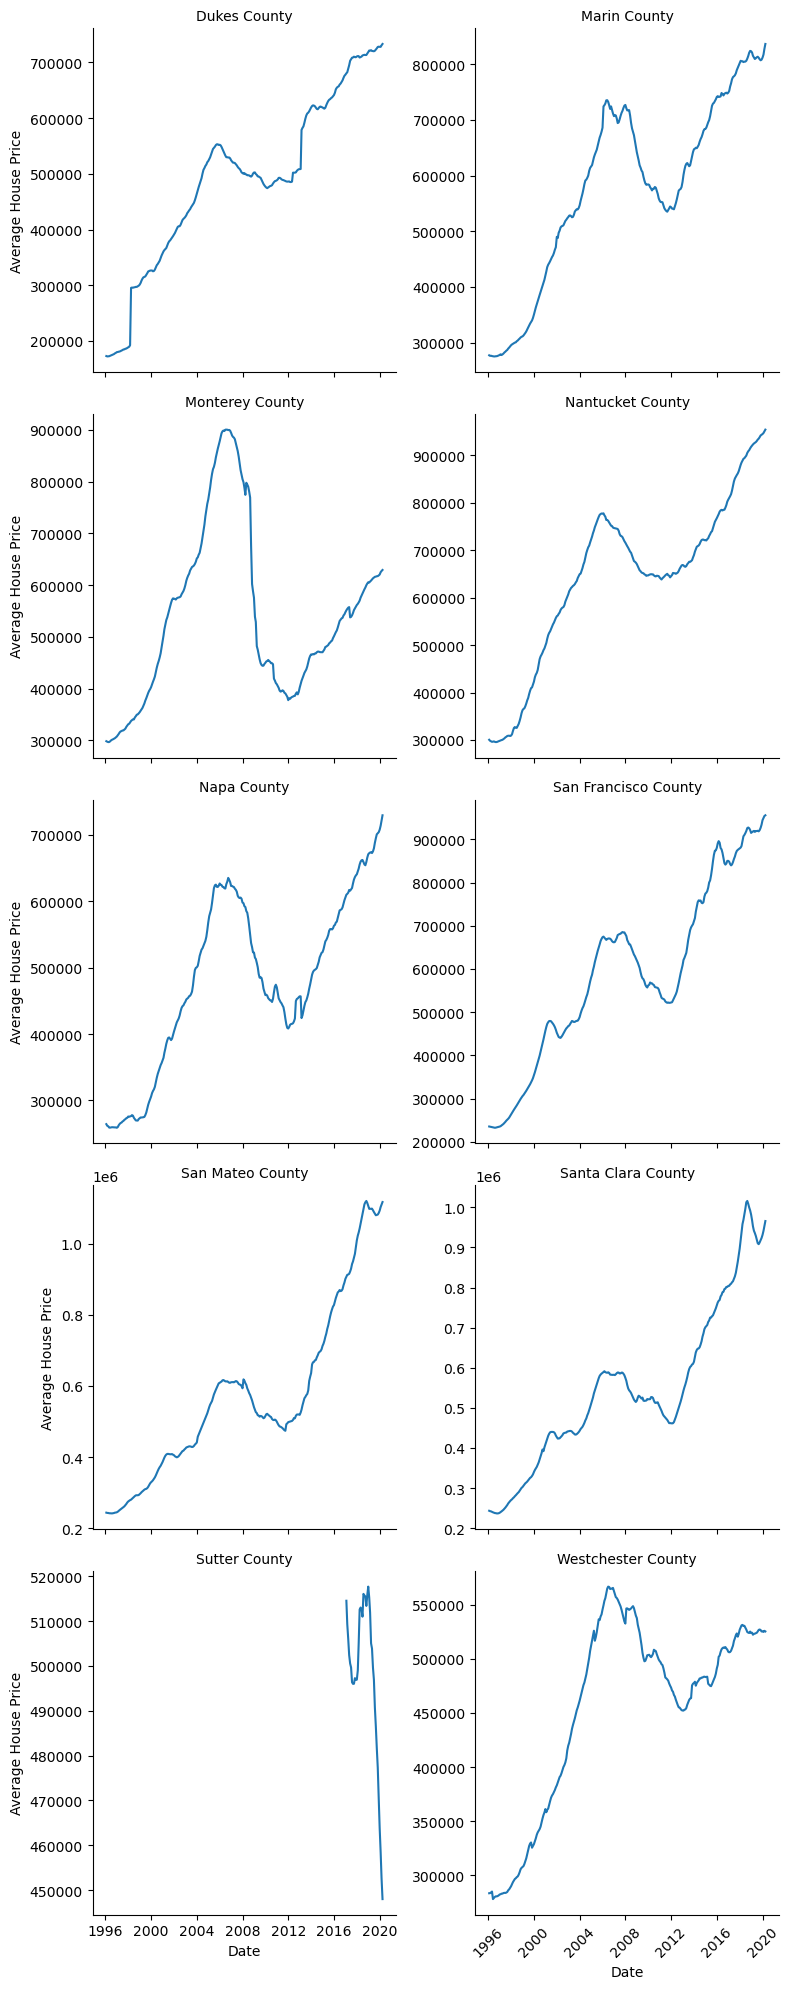

In [12]:
county_avg_prices = df_melted.groupby(['CountyName', 'Date']).mean().reset_index()

# Filter top 10 counties with highest average house prices
top_counties = county_avg_prices.groupby('CountyName')['Price'].mean().nlargest(10).index
top_county_data = county_avg_prices[county_avg_prices['CountyName'].isin(top_counties)]

# Plot multi-panel line charts
g = sns.FacetGrid(top_county_data, col='CountyName', col_wrap=2, height=4, sharey=False)
g.map(sns.lineplot, 'Date', 'Price')

g.set_axis_labels('Date', 'Average House Price')
g.set_titles('{col_name}')
plt.xticks(rotation=45)
plt.tight_layout()

In [13]:
numerical_columns = df.select_dtypes(include='number').columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Columns')

Text(0.5, 1.0, 'Correlation Matrix of Numerical Columns')

Error in callback <function flush_figures at 0x00000138D7BA41F0> (for post_execute):


KeyboardInterrupt: 

In [14]:
top_regions = df_melted.groupby('RegionName')['Price'].mean().sort_values(ascending=False)

# Display top and bottom regions
print('Top Regions with Highest Average House Prices:')
print(top_regions.head())

print('Bottom Regions with Lowest Average House Prices:')
print(top_regions.tail())

Top Regions with Highest Average House Prices:
RegionName
Jupiter Island    6.234843e+06
Golden Beach      3.925711e+06
Quogue            2.617816e+06
Sea Island        1.961089e+06
Amagansett        1.902294e+06
Name: Price, dtype: float64
Bottom Regions with Lowest Average House Prices:
RegionName
East Laurinburg    12234.253333
Bramwell           12113.955357
Big Laurel         11773.027778
Eldorado           11308.825000
Wendover           10457.222222
Name: Price, dtype: float64


In [15]:
price_changes = df_melted.groupby('RegionName')['Price'].pct_change().groupby('RegionName').mean()

# Display regions with most significant increase or decrease in house prices
print('Regions with Most Significant Increase in House Prices:')
print(price_changes.sort_values(ascending=False).head())

print('Regions with Most Significant Decrease in House Prices:')
print(price_changes.sort_values().head())

KeyError: 'RegionName'

In [ ]:
# Extract month from date
df_melted['Month'] = df_melted['Date'].dt.month

# Group by month and calculate average house prices
monthly_prices = df_melted.groupby('Month')['Price'].mean()

# Plot seasonal patterns in house prices
plt.figure(figsize=(12, 6))
monthly_prices.plot(kind='line')
plt.title('Seasonal Patterns in House Prices')
plt.xlabel('Month')
plt.ylabel('Average House Price')

In [38]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='RegionName', y='Price', data=df_melted)
plt.title('Outliers in House Prices by Region')
plt.xticks(rotation=90)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000199005199D0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df_melted['Year'] = df_melted['Date'].dt.year
yearly_prices = df_melted.groupby(['Year', 'RegionName'])['Price'].mean().unstack()

# Plot trends over time
plt.figure(figsize=(12, 6))
yearly_prices.plot()
plt.title('Average House Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average House Price')
plt.legend(loc='best')

In [ ]:
seasonal_prices = df_melted.groupby(['Year', 'Month'])['Price'].mean().unstack()

# Plot seasonal patterns within each year
plt.figure(figsize=(12, 6))
seasonal_prices.plot()
plt.title('Seasonal Patterns in House Prices Within Each Year')
plt.xlabel('Month')
plt.ylabel('Average House Price')
plt.legend(loc='best')

In [ ]:
# Group by region and calculate average house prices
regional_prices = df_melted.groupby(['RegionName', 'CountyName', 'StateName'])['Price'].mean()

print('Regional Differences in House Prices:')
print(regional_prices.sort_values(ascending=False))

In [ ]:
urban_rural_prices = df_melted.groupby('RegionType')['Price'].mean()

# Plot urban vs rural house prices
plt.figure(figsize=(12, 6))
urban_rural_prices.plot(kind='bar')
plt.title('House Prices in Urban vs. Rural Areas')
plt.xlabel('Region Type')
plt.ylabel('Average House Price')

In [ ]:
avg_price_by_state_year = df_melted.groupby(['StateName', 'Year'])['Price'].mean().reset_index()

# Calculate price change from the first to the last year
price_change = avg_price_by_state_year.groupby('StateName').apply(
    lambda x: x[x['Year'] == x['Year'].max()]['Price'].values[0] - x[x['Year'] == x['Year'].min()]['Price'].values[0]
).reset_index(name='PriceChange')

# Plot the states with the highest increase
plt.figure(figsize=(14, 8))
sns.barplot(data=price_change.sort_values('PriceChange', ascending=False), x='StateName', y='PriceChange', palette='magma')
plt.title('State with Highest Increase in House Prices')
plt.xlabel('State')
plt.ylabel('Price Increase')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

In [ ]:
metro_prices = df_melted.groupby('Metro')['Price'].mean().reset_index()

# Plot house prices in metro vs non-metro areas
plt.figure(figsize=(12, 6))
metro_prices.plot(kind='bar')
plt.title('House Prices in Metro vs. Non-Metro Areas')
plt.xlabel('Metro Area')
plt.ylabel('Average House Price')

In [ ]:
avg_price_by_county_metro = df_melted.groupby(['Metro', 'CountyName'])['Price'].mean().reset_index()

# Plot box plots for counties within each metro area
plt.figure(figsize=(14, 8))
sns.boxplot(data=avg_price_by_county_metro, x='Metro', y='Price', hue='CountyName')
plt.title('House Prices Across Counties Within Metro Areas')
plt.xlabel('Metro Area')
plt.ylabel('Average House Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

In [ ]:
avg_price_by_region = df_melted.groupby('RegionName')['Price'].mean().reset_index()

# Identify top and bottom performers
top_bottom_regions = pd.concat([
    avg_price_by_region.nlargest(10, 'Price'),
    avg_price_by_region.nsmallest(10, 'Price')
])

# Plot top and bottom performers
plt.figure(figsize=(14, 8))
sns.barplot(data=top_bottom_regions, x='RegionName', y='Price', hue='Price', palette='coolwarm')
plt.title('Top and Bottom Performing Regions by Average House Price')
plt.xlabel('Region')
plt.ylabel('Average House Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

In [ ]:
price_volatility = df_melted.groupby('RegionName')['Price'].std().reset_index()
price_volatility.columns = ['RegionName', 'PriceVolatility']

# Plot regions with the highest volatility
plt.figure(figsize=(14, 8))
sns.barplot(data=price_volatility.sort_values('PriceVolatility', ascending=False), x='RegionName', y='PriceVolatility', palette='plasma')
plt.title('House Price Volatility by Region')
plt.xlabel('Region')
plt.ylabel('Price Volatility (Standard Deviation)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

In [ ]:
avg_price_by_size_rank = df_melted.groupby('SizeRank')['Price'].mean().reset_index()

# Plot correlation between SizeRank and average house price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_price_by_size_rank, x='SizeRank', y='Price', marker='o', color='b')
plt.title('Correlation Between SizeRank and Average House Price')
plt.xlabel('SizeRank')
plt.ylabel('Average House Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print correlation coefficient
correlation = avg_price_by_size_rank['SizeRank'].corr(avg_price_by_size_rank['Price'])
print(f'Correlation coefficient between SizeRank and average house price: {correlation:.2f}')

In [ ]:
plt.figure(figsize=(14, 8))
sns.kdeplot(data=df_melted, x='Price', hue='Year', multiple='stack', palette='viridis', fill=True)
plt.title('Distribution of House Prices Over Time')
plt.xlabel('House Price')
plt.ylabel('Density')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

In [ ]:
events = {
    '2008 Financial Crisis': '2008-09-01',
    'COVID-19 Pandemic': '2020-03-01'
}

# Convert 'Date' to datetime
df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')

# Plot time series with economic events
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, x='Date', y='Price', hue='RegionName')
for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', lw=1.5)
    plt.text(pd.to_datetime(date), plt.ylim()[1] * 0.95, event, color='red', rotation=90, va='top')
plt.title('Impact of Economic Events on House Prices')
plt.xlabel('Date')
plt.ylabel('House Price')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

In [ ]:
start_prices = df_melted[df_melted['Year'] == df_melted['Year'].min()].groupby('RegionName')['Price'].mean()
end_prices = df_melted[df_melted['Year'] == df_melted['Year'].max()].groupby('RegionName')['Price'].mean()
cagr = ((end_prices / start_prices) ** (1 / (df_melted['Year'].max() - df_melted['Year'].min())) - 1) * 100
cagr_df = pd.DataFrame(cagr).reset_index()
cagr_df.columns = ['RegionName', 'CAGR']

# Plot CAGR
plt.figure(figsize=(14, 8))
sns.barplot(data=cagr_df.sort_values('CAGR', ascending=False), x='RegionName', y='CAGR', palette='cividis')
plt.title('Compound Annual Growth Rate (CAGR) of House Prices')
plt.xlabel('Region')
plt.ylabel('CAGR (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

In [ ]:
df_melted['Decade'] = (df_melted['Year'] // 10 * 10).astype(str) + 's'

# Aggregate average prices by decade
avg_price_by_decade = df_melted.groupby('Decade')['Price'].mean().reset_index()

# Plot average house prices by decade
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_decade, x='Decade', y='Price', palette='inferno')
plt.title('Average House Prices by Decade')
plt.xlabel('Decade')
plt.ylabel('Average House Price')
plt.grid(True)
plt.tight_layout()

In [ ]:
price_cv = df_melted.groupby('RegionName').agg({'Price': ['mean', 'std']})
price_cv.columns = ['MeanPrice', 'StdPrice']
price_cv['CV'] = price_cv['StdPrice'] / price_cv['MeanPrice']

# Plot CV
plt.figure(figsize=(14, 8))
sns.barplot(data=price_cv.sort_values('CV', ascending=True), x=price_cv.index, y='CV', palette='viridis')
plt.title('Price Stability by Region')
plt.xlabel('Region')
plt.ylabel('Coefficient of Variation (CV)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()